### Assignment 1 - Python and Machine Learning Basics

#### Disciplina: Introdução à Modelagem e Aprendizado
#### Alunos: Mariana Bittencourt e Thiago Lemos
#### Professor: André E. Lazzaretti

### Mostrar o data dictionary, com o significado de cada coluna do dataset

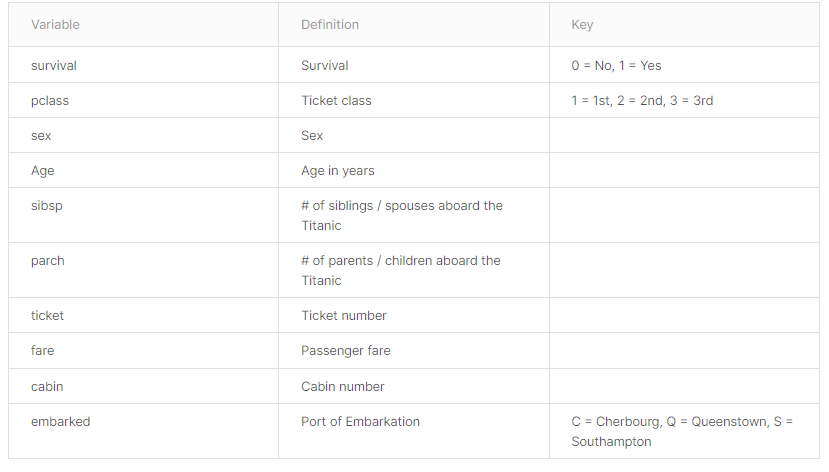

In [260]:
from IPython.display import Image
Image("data_dict.png")

### 1) Início: Importar bibliotecas necessárias

In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

In [262]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('max_colwidth', None)

### 2) Carregar os arquivos (train e test) e visualizar as primeiras linhas do arquivo de treinamento

In [263]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [264]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 3) Buscar informações sobre o dataset

In [265]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Obs.: As colunas Age, Cabin e Embarked têm registros faltando.

### 4) Preencher a coluna de idade com a média de idade

In [266]:
df_train['Age'].isna().sum()

177

In [267]:
df_train['Age'] = df_train['Age'].fillna(np.mean(df_train["Age"]))

In [268]:
df_test['Age'] = df_test['Age'].fillna(np.mean(df_test["Age"]))

In [269]:
df_train['Age'].isna().sum()

0

In [270]:
df_test['Age'].isna().sum()

0

### 5) Descartar a coluna "Cabin" e "Ticket"

In [271]:
df_train = df_train.drop("Cabin",axis=1)

In [272]:
df_test = df_test.drop("Cabin",axis=1)

In [273]:
df_train = df_train.drop("Ticket",axis=1)

In [274]:
df_test = df_test.drop("Ticket",axis=1)

In [275]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

In [276]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### 6) Visualizar quantidade de sobreviventes de acordo com o local de embarque

<AxesSubplot:xlabel='Embarked', ylabel='count'>

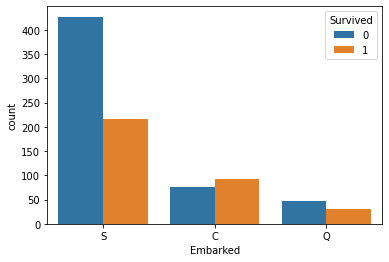

In [277]:
sns.countplot(x='Embarked',hue='Survived',data=df_train)

#### Obs.: Parece que as pessoas que embarcaram em Cherboug (C) tiveram uma taxa de sobrevivência maior

### 7) Função para verificar se a pessoa estava sozinha no navio

In [278]:
def is_alone(row):
    if row['SibSp'] == 0 and row['Parch'] == 0:
        return 1
    else:
        return 0

### 8) Aplicando a função is_alone

In [279]:
df_train['is_alone'] = df_train.apply(is_alone,axis=1)
df_test['is_alone'] = df_test.apply(is_alone,axis=1)

In [280]:
df_train['is_alone'].value_counts()

1    537
0    354
Name: is_alone, dtype: int64

#### Resultado: 537 pessoas estavam sozinhas

### 9) Verificar se uma pessoa estar sozinha faz diferença na taxa de sobrevivência

<AxesSubplot:xlabel='is_alone', ylabel='count'>

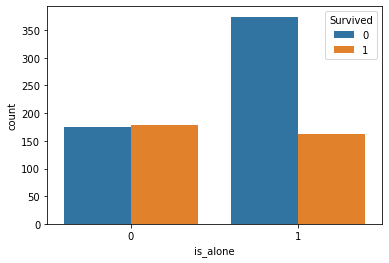

In [281]:
sns.countplot(x='is_alone',hue='Survived',data=df_train) 

### 10) Verificar se o gênero influencia na taxa de sobrevivência

<AxesSubplot:xlabel='Sex', ylabel='count'>

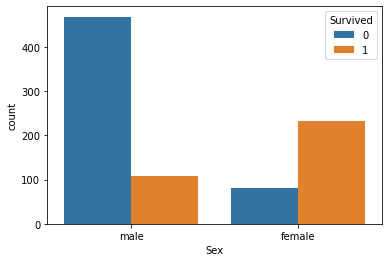

In [282]:
sns.countplot(x='Sex',hue='Survived',data=df_train) 

### 11) Função para verificar se é um homem solteiro (sem filhos ou esposa), mulher solteira, homem casado ou mulher casada

In [283]:
def class_gender_married(row):
    if row['SibSp'] == 0 and row['Sex'] == 'male':
        return 'Single man'
    elif row['SibSp'] == 0 and row["Sex"] == 'female':
        return 'Single woman'
    elif row["SibSp"] > 0 and row['Sex'] == 'male':
        return 'Married man'
    else:
        return 'Married woman'

### 12) Aplicando a função class_gender_married

In [284]:
df_train['class_gender_married'] = df_train.apply(class_gender_married,axis=1)
df_test['class_gender_married'] = df_test.apply(class_gender_married,axis=1)

In [285]:
df_train['class_gender_married'].value_counts()

Single man       434
Single woman     174
Married man      143
Married woman    140
Name: class_gender_married, dtype: int64

### 13) Plotando para verificar se a coluna class_gender_married tem influência na taxa de sobrevivência

<AxesSubplot:xlabel='class_gender_married', ylabel='count'>

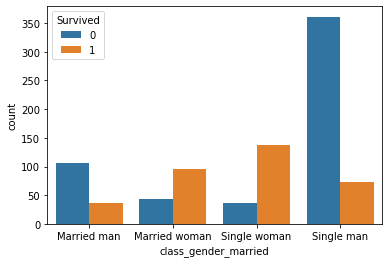

In [286]:
sns.countplot(x='class_gender_married',hue='Survived',data=df_train)

#### Conclusão: O estado civil não tem ou tem pouca influência na taxa de sobrevivência. A influência maior é do gênero. Por isso, vamos descartar a coluna class_gender_married

In [287]:
df_train.drop('class_gender_married',axis=1,inplace=True)
df_test.drop('class_gender_married',axis=1,inplace=True)

In [288]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'is_alone'],
      dtype='object')

In [289]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'is_alone'],
      dtype='object')

In [290]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'is_alone'],
      dtype='object')

### 14) Função para verificar se a pessoa tem menos de 18 anos (criança)

In [291]:
def is_child(row):
    if row['Age'] < 18:
        return 1
    else:
        return 0

In [292]:
df_train['is_child'] = df_train.apply(is_child,axis=1)
df_test['is_child'] = df_test.apply(is_child,axis=1)

In [293]:
df_train['is_child'].value_counts()

0    778
1    113
Name: is_child, dtype: int64

### 15) Plotando para verificar se ser criança tem influência na taxa de sobrevivência

<AxesSubplot:xlabel='is_child', ylabel='count'>

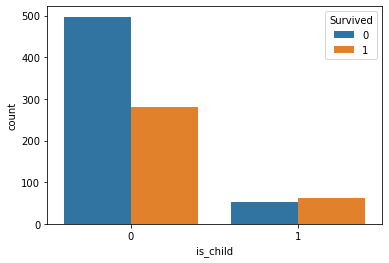

In [294]:
sns.countplot(x='is_child',hue='Survived',data=df_train)

#### Conclusão: Sim, tem influência

In [295]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone,is_child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,0


In [296]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  is_alone     891 non-null    int64  
 11  is_child     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


### 16) Verificando quais linhas possuem valores nulos para a coluna "Embarked" (treino) e substituindo esses valores aleatoriamente

In [297]:
df_train[df_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone,is_child
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN,1,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN,1,0


In [298]:
df_train.loc[61,"Embarked"] = "S"

In [299]:
df_train.loc[829,"Embarked"] = "C"

In [300]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  is_alone     891 non-null    int64  
 11  is_child     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [301]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
 9   is_alone     418 non-null    int64  
 10  is_child     418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


### 17) Verificando quais linhas possuem valores nulos para a coluna "Fare" (teste) e substituindo esses valores pela média da coluna

In [302]:
df_test['Fare'] = df_test['Fare'].fillna(np.mean(df_test["Fare"]))

### 18) Agora, fazendo uma análise de títulos, visto que títulos nobres eram mais propensos a sobreviver (comprovaremos isso com o código abaixo)

In [303]:
import re

In [304]:
def extract_titles(row):
    title = re.findall('([A-Za-z]+)\.',row['Name'])[0]
    # replace titles with a more common title or as Rare
    if title in ['Lady', 'Countess','Dona']:   #Noble women
        return 1
    elif title == 'Mlle' or title == 'Ms' or title=='Miss':   #Single women
        return 2
    elif title == 'Mme' or title == 'Mrs':   #Married women
        return 3
    elif title == 'Mr':    #Married men
        return 4
    elif title in ['Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer']:   #Men
        return 5

In [305]:
df_train['Title'] = df_train.apply(extract_titles,axis=1)

In [306]:
df_test['Title'] = df_test.apply(extract_titles,axis=1)

In [307]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone,is_child,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,0,4.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,71.2833,C,0,0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,0,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,0,4.0


In [308]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone,is_child,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,0,4.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,0,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,0,4.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,0,4.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0,0,3.0


### 19) Analisando o gráfico com a taxa de sobrevivência e os títulos (1 = Noble women, 2 = Single women, 3 = Married women, 4 = Married men, 5 = Men)

<AxesSubplot:xlabel='Title', ylabel='count'>

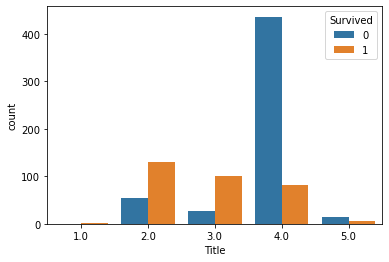

In [309]:
sns.countplot(x='Title',hue='Survived',data=df_train)

### 20) Como fica um pouco difícil de ver no gráfico para as classes 1,2,3 e 5, vamos fazer uma função para calcular a taxa de sobrevivência para que fique mais claro

In [310]:
def calc_taxa_sobrevivencia(df,feature,classe):
    df_feature = df[df[feature] == classe]
    total_pessoas = len(df_feature.index)
    sobreviventes = len(df_feature[df_feature['Survived'] == 1].index)
    taxa_sobrevivencia = sobreviventes/total_pessoas * 100
    return taxa_sobrevivencia

In [311]:
#Calculando a taxa de sobrevivêabsncia das classes de títulos

taxa_classe1 = calc_taxa_sobrevivencia(df_train,"Title",1.0)
taxa_classe2 = calc_taxa_sobrevivencia(df_train,"Title",2.0)
taxa_classe3 = calc_taxa_sobrevivencia(df_train,"Title",3.0)
taxa_classe4 = calc_taxa_sobrevivencia(df_train,"Title",4.0)
taxa_classe5 = calc_taxa_sobrevivencia(df_train,"Title",5.0)

In [312]:
print("Taxas de sobrevivência:\n")
print("Classe 1 (Noble Women):" + str(np.round(taxa_classe1,2)) + "\n")
print("Classe 2 (Single Women):" + str(np.round(taxa_classe2,2)) + "\n")
print("Classe 3 (Married Women):" + str(np.round(taxa_classe3,2)) + "\n")
print("Classe 4 (Married Men):" + str(np.round(taxa_classe4,2)) + "\n")
print("Classe 5 (Men):" + str(np.round(taxa_classe5,2)) + "\n")

Taxas de sobrevivência:

Classe 1 (Noble Women):100.0

Classe 2 (Single Women):70.27

Classe 3 (Married Women):79.37

Classe 4 (Married Men):15.67

Classe 5 (Men):28.57



#### Conclusão: Das mulheres da nobreza, 100% sobreviveram. Logo, o título também tem influência na taxa de sobrevivência, além da questão do gênero. Por isso manteremos essa coluna de "Title"

### 21) Verificando a influência das classes de passageiros na taxa de sobrevivência

<AxesSubplot:xlabel='Pclass', ylabel='count'>

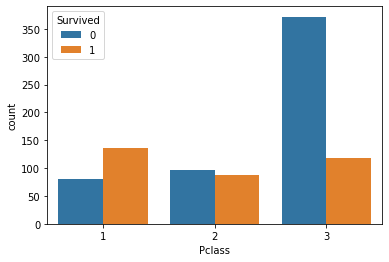

In [313]:
sns.countplot(x='Pclass',hue='Survived',data=df_train)

#### Conclusão: Mais passageiros da terceira classe não sobreviveram que os das demais classes. Manteremos essa coluna

### 22) Descartando a coluna de nome, já que já extraímos o título

In [314]:
df_train.drop('Name',axis=1,inplace=True)
df_test.drop('Name',axis=1,inplace=True)

In [315]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'is_alone', 'is_child', 'Title'],
      dtype='object')

In [316]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'is_alone', 'is_child', 'Title'],
      dtype='object')

### 23) Descartando as colunas "SibSp" e "Parch", pois já as utilizamos para calcular se a pessoa estaria sozinha no navio

In [317]:
df_train.drop(['SibSp','Parch'],axis=1,inplace=True)
df_test.drop(['SibSp','Parch'],axis=1,inplace=True)

In [318]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'is_alone', 'is_child', 'Title'],
      dtype='object')

In [319]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'is_alone',
       'is_child', 'Title'],
      dtype='object')

### 24) Visualizando os datasets de treinamento e teste

In [320]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,is_alone,is_child,Title
0,1,0,3,male,22.0,7.2500,S,0,0,4.0
1,2,1,1,female,38.0,71.2833,C,0,0,3.0
2,3,1,3,female,26.0,7.9250,S,1,0,2.0
3,4,1,1,female,35.0,53.1000,S,0,0,3.0
4,5,0,3,male,35.0,8.0500,S,1,0,4.0


In [321]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,is_alone,is_child,Title
0,892,3,male,34.5,7.8292,Q,1,0,4.0
1,893,3,female,47.0,7.0000,S,0,0,3.0
2,894,2,male,62.0,9.6875,Q,1,0,4.0
3,895,3,male,27.0,8.6625,S,1,0,4.0
4,896,3,female,22.0,12.2875,S,0,0,3.0


### 25) Mover a coluna "Survived" para o final do DataFrame de treinamento

In [322]:
df_train.insert(len(df_train.columns)-1, 'Survived', df_train.pop('Survived'))

In [323]:
df_train.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,is_alone,is_child,Title,Survived
0,1,3,male,22.0,7.2500,S,0,0,4.0,0
1,2,1,female,38.0,71.2833,C,0,0,3.0,1
2,3,3,female,26.0,7.9250,S,1,0,2.0,1
3,4,1,female,35.0,53.1000,S,0,0,3.0,1
4,5,3,male,35.0,8.0500,S,1,0,4.0,0


### 26) Está na hora de transformar as colunas categóricas, tornando as categorias em números. Primeiro, a coluna "Sex"

In [324]:
dict_sex = {"male":0,"female":1}
df_train['Sex'] = df_train['Sex'].map(dict_sex)

In [325]:
df_train.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,is_alone,is_child,Title,Survived
0,1,3,0,22.0,7.2500,S,0,0,4.0,0
1,2,1,1,38.0,71.2833,C,0,0,3.0,1
2,3,3,1,26.0,7.9250,S,1,0,2.0,1
3,4,1,1,35.0,53.1000,S,0,0,3.0,1
4,5,3,0,35.0,8.0500,S,1,0,4.0,0


In [326]:
df_test['Sex'] = df_test['Sex'].map(dict_sex)

In [327]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,is_alone,is_child,Title
0,892,3,0,34.5,7.8292,Q,1,0,4.0
1,893,3,1,47.0,7.0000,S,0,0,3.0
2,894,2,0,62.0,9.6875,Q,1,0,4.0
3,895,3,0,27.0,8.6625,S,1,0,4.0
4,896,3,1,22.0,12.2875,S,0,0,3.0


### 27) Agora, a coluna "Embarked"

In [328]:
dict_embarked = {"Q":0,"S":1,"C":2}
df_train['Embarked'] = df_train['Embarked'].map(dict_embarked)

In [329]:
df_train.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,is_alone,is_child,Title,Survived
0,1,3,0,22.0,7.2500,1,0,0,4.0,0
1,2,1,1,38.0,71.2833,2,0,0,3.0,1
2,3,3,1,26.0,7.9250,1,1,0,2.0,1
3,4,1,1,35.0,53.1000,1,0,0,3.0,1
4,5,3,0,35.0,8.0500,1,1,0,4.0,0


In [330]:
df_test['Embarked'] = df_test['Embarked'].map(dict_embarked)

In [331]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,is_alone,is_child,Title
0,892,3,0,34.5,7.8292,0,1,0,4.0
1,893,3,1,47.0,7.0000,1,0,0,3.0
2,894,2,0,62.0,9.6875,0,1,0,4.0
3,895,3,0,27.0,8.6625,1,1,0,4.0
4,896,3,1,22.0,12.2875,1,0,0,3.0


### 28) Próximo passo: OneHot Encoding para transformar as features categóricas com mais de duas classes em colunas binárias

#### Primeiro para a coluna "Pclass", utilizando a função get_dummies do Pandas

In [332]:
dummies_Pclass = pd.get_dummies(df_train['Pclass'])

In [333]:
dummies_Pclass = dummies_Pclass.rename(columns={1:"first_class",2:"second_class",3:"third_class"})

In [334]:
df_train = df_train.join(dummies_Pclass)

In [335]:
df_train.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,is_alone,is_child,Title,Survived,first_class,second_class,third_class
0,1,3,0,22.0,7.2500,1,0,0,4.0,0,0,0,1
1,2,1,1,38.0,71.2833,2,0,0,3.0,1,1,0,0
2,3,3,1,26.0,7.9250,1,1,0,2.0,1,0,0,1
3,4,1,1,35.0,53.1000,1,0,0,3.0,1,1,0,0
4,5,3,0,35.0,8.0500,1,1,0,4.0,0,0,0,1


In [336]:
df_train.drop('Pclass',axis=1,inplace=True)

In [337]:
df_train.head()

,PassengerId,Sex,Age,Fare,Embarked,is_alone,is_child,Title,Survived,first_class,second_class,third_class
0,1,0,22.0,7.2500,1,0,0,4.0,0,0,0,1
1,2,1,38.0,71.2833,2,0,0,3.0,1,1,0,0
2,3,1,26.0,7.9250,1,1,0,2.0,1,0,0,1
3,4,1,35.0,53.1000,1,0,0,3.0,1,1,0,0
4,5,0,35.0,8.0500,1,1,0,4.0,0,0,0,1


In [338]:
dummies_Pclass_test = pd.get_dummies(df_test['Pclass'])

In [339]:
dummies_Pclass_test = dummies_Pclass_test.rename(columns={1:"first_class",2:"second_class",3:"third_class"})

In [340]:
df_test = df_test.join(dummies_Pclass_test)

In [341]:
df_test.drop("Pclass",inplace=True,axis=1)

In [342]:
df_test.head()

,PassengerId,Sex,Age,Fare,Embarked,is_alone,is_child,Title,first_class,second_class,third_class
0,892,0,34.5,7.8292,0,1,0,4.0,0,0,1
1,893,1,47.0,7.0000,1,0,0,3.0,0,0,1
2,894,0,62.0,9.6875,0,1,0,4.0,0,1,0
3,895,0,27.0,8.6625,1,1,0,4.0,0,0,1
4,896,1,22.0,12.2875,1,0,0,3.0,0,0,1


#### Agora para a coluna Embarked, também utilizando get_dummies

In [343]:
dummies_embarked = pd.get_dummies(df_train['Embarked'])
dummies_embarked = dummies_embarked.rename(columns={0:"embarked_Q",1:"embarked_S",2:"embarked_C"})
df_train = df_train.join(dummies_embarked)
df_train.drop('Embarked',axis=1,inplace=True)

In [344]:
df_train.head()

,PassengerId,Sex,Age,Fare,is_alone,is_child,Title,Survived,first_class,second_class,third_class,embarked_Q,embarked_S,embarked_C
0,1,0,22.0,7.2500,0,0,4.0,0,0,0,1,0,1,0
1,2,1,38.0,71.2833,0,0,3.0,1,1,0,0,0,0,1
2,3,1,26.0,7.9250,1,0,2.0,1,0,0,1,0,1,0
3,4,1,35.0,53.1000,0,0,3.0,1,1,0,0,0,1,0
4,5,0,35.0,8.0500,1,0,4.0,0,0,0,1,0,1,0


In [345]:
dummies_embarked_test = pd.get_dummies(df_test['Embarked'])
dummies_embarked_test = dummies_embarked_test.rename(columns={0:"embarked_Q",1:"embarked_S",2:"embarked_C"})
df_test = df_test.join(dummies_embarked_test)
df_test.drop('Embarked',axis=1,inplace=True)

In [346]:
df_test.head()

,PassengerId,Sex,Age,Fare,is_alone,is_child,Title,first_class,second_class,third_class,embarked_Q,embarked_S,embarked_C
0,892,0,34.5,7.8292,1,0,4.0,0,0,1,1,0,0
1,893,1,47.0,7.0000,0,0,3.0,0,0,1,0,1,0
2,894,0,62.0,9.6875,1,0,4.0,0,1,0,1,0,0
3,895,0,27.0,8.6625,1,0,4.0,0,0,1,0,1,0
4,896,1,22.0,12.2875,0,0,3.0,0,0,1,0,1,0


#### Agora, por último, para a coluna "Title"

In [347]:
dummies_title = pd.get_dummies(df_train['Title'])
dummies_title = dummies_title.rename(columns={1.0:"noble_women",2.0:"single_women",3.0:"married_women",4.0:"married_men",5.0:"men"})
df_train = df_train.join(dummies_title)
df_train.drop('Title',axis=1,inplace=True)

In [348]:
df_train.head()

,PassengerId,Sex,Age,Fare,is_alone,is_child,Survived,first_class,second_class,third_class,embarked_Q,embarked_S,embarked_C,noble_women,single_women,married_women,married_men,men
0,1,0,22.0,7.2500,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,2,1,38.0,71.2833,0,0,1,1,0,0,0,0,1,0,0,1,0,0
2,3,1,26.0,7.9250,1,0,1,0,0,1,0,1,0,0,1,0,0,0
3,4,1,35.0,53.1000,0,0,1,1,0,0,0,1,0,0,0,1,0,0
4,5,0,35.0,8.0500,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [349]:
dummies_title_test = pd.get_dummies(df_test['Title'])
dummies_title_test = dummies_title_test.rename(columns={1.0:"noble_women",2.0:"single_women",3.0:"married_women",4.0:"married_men",5.0:"men"})
df_test = df_test.join(dummies_title_test)
df_test.drop('Title',axis=1,inplace=True)

In [350]:
df_test.head()

,PassengerId,Sex,Age,Fare,is_alone,is_child,first_class,second_class,third_class,embarked_Q,embarked_S,embarked_C,noble_women,single_women,married_women,married_men,men
0,892,0,34.5,7.8292,1,0,0,0,1,1,0,0,0,0,0,1,0
1,893,1,47.0,7.0000,0,0,0,0,1,0,1,0,0,0,1,0,0
2,894,0,62.0,9.6875,1,0,0,1,0,1,0,0,0,0,0,1,0
3,895,0,27.0,8.6625,1,0,0,0,1,0,1,0,0,0,0,1,0
4,896,1,22.0,12.2875,0,0,0,0,1,0,1,0,0,0,1,0,0


### 29) Vamos aplicar um método de escala para as colunas Age e Fare, a fim de que fiquem dentro da mesma escala

In [351]:
from sklearn.preprocessing import MinMaxScaler

In [352]:
scaler = MinMaxScaler()

In [353]:
scaler.fit(df_train[['Age','Fare']])

MinMaxScaler()

In [354]:
new_data = scaler.transform(df_train[['Age','Fare']])

In [355]:
df_train['Age'] = pd.Series(new_data[:,0])

In [356]:
df_train.head()

,PassengerId,Sex,Age,Fare,is_alone,is_child,Survived,first_class,second_class,third_class,embarked_Q,embarked_S,embarked_C,noble_women,single_women,married_women,married_men,men
0,1,0,0.271174,7.2500,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,2,1,0.472229,71.2833,0,0,1,1,0,0,0,0,1,0,0,1,0,0
2,3,1,0.321438,7.9250,1,0,1,0,0,1,0,1,0,0,1,0,0,0
3,4,1,0.434531,53.1000,0,0,1,1,0,0,0,1,0,0,0,1,0,0
4,5,0,0.434531,8.0500,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [357]:
df_train['Fare'] = pd.Series(new_data[:,1])

In [358]:
df_train.head()

,PassengerId,Sex,Age,Fare,is_alone,is_child,Survived,first_class,second_class,third_class,embarked_Q,embarked_S,embarked_C,noble_women,single_women,married_women,married_men,men
0,1,0,0.271174,0.014151,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,2,1,0.472229,0.139136,0,0,1,1,0,0,0,0,1,0,0,1,0,0
2,3,1,0.321438,0.015469,1,0,1,0,0,1,0,1,0,0,1,0,0,0
3,4,1,0.434531,0.103644,0,0,1,1,0,0,0,1,0,0,0,1,0,0
4,5,0,0.434531,0.015713,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [359]:
new_data_test = scaler.transform(df_test[['Age','Fare']])

In [360]:
df_test['Age'] = pd.Series(new_data_test[:,0])

In [361]:
df_test['Fare'] = pd.Series(new_data_test[:,1])

In [362]:
df_test.head()

,PassengerId,Sex,Age,Fare,is_alone,is_child,first_class,second_class,third_class,embarked_Q,embarked_S,embarked_C,noble_women,single_women,married_women,married_men,men
0,892,0,0.428248,0.015282,1,0,0,0,1,1,0,0,0,0,0,1,0
1,893,1,0.585323,0.013663,0,0,0,0,1,0,1,0,0,0,1,0,0
2,894,0,0.773813,0.018909,1,0,0,1,0,1,0,0,0,0,0,1,0
3,895,0,0.334004,0.016908,1,0,0,0,1,0,1,0,0,0,0,1,0
4,896,1,0.271174,0.023984,0,0,0,0,1,0,1,0,0,0,1,0,0


### 30) Separar uma parte do dataset de treinamento para testar antes de submeter no Kaggle

In [363]:
df_test2 = df_train.iloc[:100,:]

In [364]:
df_train = df_train.iloc[100:,:]

### 31) Separando os labels das features

In [365]:
X_train = df_train.drop('Survived',axis=1)
y_train = df_train['Survived']
X_test = df_test
x_test2 = df_test2.drop('Survived',axis=1)
y_test2 = df_test2['Survived']

In [366]:
X_train.drop("PassengerId",axis=1,inplace=True)
passenger_id = X_test['PassengerId']
passenger_id2 = x_test2['PassengerId']

In [371]:
x_test2.drop("PassengerId",axis=1,inplace=True)

### 32) Vamos começar com os modelos. Primeiro, faremos com o modelo Logistic Regression

In [367]:
from sklearn.linear_model import LogisticRegression

In [368]:
lr = LogisticRegression(C=100.0, random_state=1,max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(C=100.0, max_iter=1000, random_state=1)

#### Após o treinamento, é a hora de estimar os labels

In [391]:
y_predicted = lr.predict(x_test2)

### 33) Para avaliar os modelos de classificação, vamos utilizar a Confusion Matrix, que coloca de forma gráfica os acertos e erros de classificação

In [399]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [406]:
from sklearn.metrics import classification_report, accuracy_score

In [403]:
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test2, y_predicted),display_labels=['Morreu','Sobreviveu'])

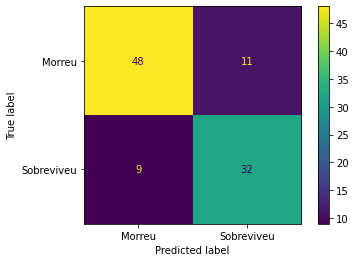

In [404]:
cmd.plot()

#### Pela Confusion Matrix, o modelo teve um bom resultado, pois foram apenas 9 falso negativos e 11 falso positivos, de um total de 100 exemplos

In [409]:
print("Model Accuracy:" + str(accuracy_score(y_test2,y_predicted) * 100))

Model Accuracy:80.0


#### E temos uma acurácia de 80%. Isso é bom!

### 34) Vamos tentar com outro modelo agora. Dessa vez, SVM.

In [410]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

#### Vamos variar um pouco os parâmetros para ver qual combinação nos traz o melhor resultado, utilizando Grid Search

In [411]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

In [413]:
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [415]:
pd.DataFrame(clf.cv_results_)[['params','rank_test_score','mean_test_score']]

,params,rank_test_score,mean_test_score
0,"{'C': 1, 'kernel': 'linear'}",3,0.792684
1,"{'C': 1, 'kernel': 'rbf'}",1,0.816710
2,"{'C': 10, 'kernel': 'linear'}",3,0.792684
3,"{'C': 10, 'kernel': 'rbf'}",2,0.811647


#### Segundo a tabela acima, a melhor combinação é kernel = rbf e C = 1. Utiizaremos então esses parâmetros.

In [416]:
svc = svm.SVC(kernel='rbf',C=1.0)

In [417]:
svc.fit(X_train,y_train)

SVC()

In [418]:
y_predicted_svm = svc.predict(x_test2)

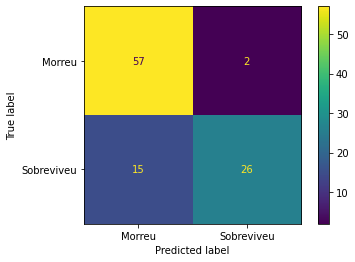

In [419]:
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test2, y_predicted_svm),display_labels=['Morreu','Sobreviveu'])
cmd.plot()

In [420]:
print("Model Accuracy:" + str(accuracy_score(y_test2,y_predicted_svm) * 100))

Model Accuracy:83.0


#### Opa, temos uma acurácia maior que o modelo anterior! Legal!

### 35) Por último, vamos tentar com uma Decision Tree!

In [421]:
from sklearn.tree import DecisionTreeClassifier

In [422]:
dtc = DecisionTreeClassifier()

In [425]:
parameters_tree = {'criterion':['gini', 'entropy'],'max_depth':[10,100,1000]}

In [426]:
clf_tree = GridSearchCV(dtc, parameters_tree)
clf_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 100, 1000]})

In [427]:
pd.DataFrame(clf_tree.cv_results_)[['params','rank_test_score','mean_test_score']]

,params,rank_test_score,mean_test_score
0,"{'criterion': 'gini', 'max_depth': 10}",2,0.799005
1,"{'criterion': 'gini', 'max_depth': 100}",5,0.781291
2,"{'criterion': 'gini', 'max_depth': 1000}",5,0.781291
3,"{'criterion': 'entropy', 'max_depth': 10}",2,0.799005
4,"{'criterion': 'entropy', 'max_depth': 100}",1,0.800271
5,"{'criterion': 'entropy', 'max_depth': 1000}",4,0.787620


In [428]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=100)

In [429]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [430]:
y_predicted_tree = dtc.predict(x_test2)

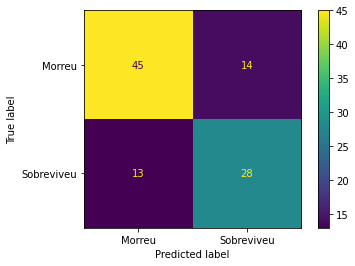

In [431]:
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test2, y_predicted_tree),display_labels=['Morreu','Sobreviveu'])
cmd.plot()

In [432]:
print("Model Accuracy:" + str(accuracy_score(y_test2,y_predicted_tree) * 100))

Model Accuracy:73.0


#### Pelo jeito, o modelo com maior taxa de acertos é o SVM. Vamos utilizá-lo para gerar as saídas e submeter as respostas no Kaggle.

In [433]:
df_result = pd.DataFrame(columns=['PassengerId',"Survived"])

In [436]:
X_test.drop("PassengerId",axis=1,inplace=True)

In [437]:
y_predicted_final = svc.predict(X_test)

In [438]:
df_result['PassengerId'] = pd.Series(passenger_id)
df_result["Survived"] = pd.Series(y_predicted_final)

In [439]:
df_result.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [442]:
len(df_result)

418

In [444]:
df_result.to_csv('svm_submission.csv',index=False)

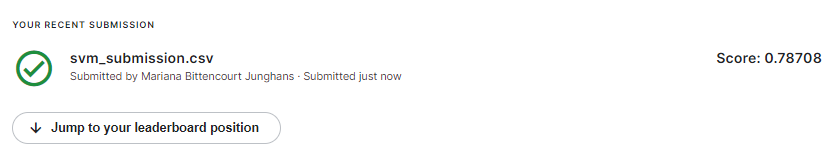

In [445]:
Image("score.png")

### Pontuação final no Kaggle: 0.78708